# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên
**Subject**        : Applied Mathematics and Statistics for Imformation Technology <br>
**Student Name**   : Phạm Hồng Gia Bảo <br>
**Student ID**     : 21127014 <br>
**Class**          : 21CLC07 <br>

# Import

In [253]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Đọc dữ liệu

In [254]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :11]    # Dataframe (chứa 11 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :11]      # Dataframe (chứa 11 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [255]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y
        return self

    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)   

# hàm tính RMSE
def rmse(y, y_hat):
    return np.sqrt(np.mean((y.ravel() - y_hat.ravel())**2))

def get_features(correlation_threshold):
    abs_corrs = np.abs(correlations)
    high_corrs = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_corrs

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [256]:
# Phần code cho yêu cầu 1a
model = LinearRegression(fit_intercept=True)
model.fit(train.iloc[:, :11], train.iloc[:, -1])

# Predict target variable for the test data
y_hat = model.predict(test.iloc[:, :11])

# Create a DataFrame with actual and predicted values
prediction = pd.DataFrame({'Actual': test.iloc[:, -1], 'Predicted': y_hat})
# Round the values to three decimal places
prediction = prediction.round(3)
print(prediction)

# Create a DataFrame with coefficients, including the intercept
coef_data = {'Feature': ['Intercept'] + train.iloc[:, :11].columns.tolist(),
             'Coefficient': [model.intercept_] + model.coef_.tolist()}
coef = pd.DataFrame(coef_data)
# Round the coefficient values to three decimal places
coef = coef.round(3)
print(coef)


     Actual   Predicted
0    280000  194207.932
1    520000  340719.587
2    150000  325416.849
3    180000  273672.748
4    300000  298369.367
..      ...         ...
745  330000  283138.706
746  450000  381114.180
747  180000  297490.123
748   90000  242061.854
749  360000  328403.653

[750 rows x 2 columns]
            Feature  Coefficient
0         Intercept    49248.090
1            Gender   -23183.330
2      10percentage      702.767
3      12percentage     1259.019
4       CollegeTier   -99570.608
5            Degree    18369.962
6        collegeGPA     1297.532
7   CollegeCityTier    -8836.727
8           English      141.760
9           Logical      145.742
10            Quant      114.643
11           Domain    34955.750


In [257]:
def calculateMAE(true_values, predicted_values):
    return np.mean(np.abs(true_values - predicted_values))

In [258]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
print('MAE:', round(calculateMAE(y_test, y_hat), 3))

MAE: 105052.53


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

Salary = -23183.330*`Gender` + 702.767*`10percentage` + 1259.019*`12percentage` + -99570.608*`CollegeTier` </br>
+18369.962*`Degree` +1297.532*`collegeGPA` + -8836.727*`CollegeCityTier` + 141.760*`English` </br>
+145.742*`Logical` + 114.643*`Quant` + 34955.750*`Domain` +  49248.090

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [259]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
# Read the training data from a CSV file
train_f = pd.read_csv('train.csv')

# Shuffle the training data
train_f = train_f.sample(frac=1)

# Extract the target variable
y_df = train_f.iloc[:, -1]

# Initialize lists to store scores, cross-validation results, and MAE
scores = []
cross = []
MAE = []

# Create a LinearRegression model with intercept
reg = LinearRegression(fit_intercept=True)

# Select the last 5 features from the dataset
feature_names = train_f.columns[-6:-1]
feature = [train_f[name].values.reshape(-1, 1) for name in feature_names]

# Perform cross-validation and calculate MAE for each selected feature
for i in range(len(feature)):
    scores.append(cross_val_score(reg, feature[i], y_df, scoring="neg_mean_absolute_error", cv=5))

# Calculate the average MAE and store the results
for i in range(len(scores)):
    MAE.append(np.absolute(scores[i]).mean())
    cross.append([feature_names[i], round(MAE[i], 3)])

# Create a DataFrame with feature names and average MAE
test = pd.DataFrame(cross, columns=['Feature', 'Average MAE'])
print(test)
print()

# Find the index of the feature with the lowest average MAE
best_index = np.argmin(MAE)
print("Min Average MAE:", feature_names[best_index])

                 Feature  Average MAE
0      conscientiousness   124358.101
1          agreeableness   123814.222
2           extraversion   123915.981
3            nueroticism   123666.645
4  openess_to_experience   123974.603

Min Average MAE: nueroticism


In [260]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
# Read the training and test data from CSV files
train2 = pd.read_csv('train.csv')
test2 = pd.read_csv('test.csv')

# Extract the selected feature for training data
X_k_train = train2[feature_names[best_index]].values.reshape(-1, 1)
y_k_train = train2.iloc[:, -1]

# Extract the selected feature for test data
X_k_test = test2[feature_names[best_index]].values.reshape(-1, 1)
y_k_test = test2.iloc[:, -1]

# Fit a linear regression model on the selected feature
reg2 = LinearRegression().fit(X_k_train, y_k_train)

# Predict the target variable for the test data
y_k_test_pred = reg2.predict(X_k_test)

# Create a DataFrame with actual and predicted values
k_predic = pd.DataFrame({'Data in file': y_k_test, 'Predicted': y_k_test_pred})
# Round the values to three decimal places
k_predic = k_predic.round(3)
print(k_predic)

# Create a DataFrame with the coefficient of the linear regression model
k_coef = pd.DataFrame({'Feature': feature_names[best_index], 'Coefficient': reg2.coef_})
# Round the coefficient value to three decimal places
k_coef = k_coef.round(3)
print(k_coef)

print('Intercept value ', reg2.intercept_.round(3))



     Data in file   Predicted
0          280000  316828.694
1          520000  296119.311
2          150000  297530.805
3          180000  294185.517
4          300000  290122.466
..            ...         ...
745        330000  328713.438
746        450000  303649.413
747        180000  326681.913
748         90000  322476.271
749        360000  299884.362

[750 rows x 2 columns]
       Feature  Coefficient
0  nueroticism   -16021.494
Intercept value  304647.553


In [261]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
print("MAE: ", round(mean_absolute_error(y_k_test, y_k_test_pred),3))

MAE:  119361.917


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -16021.494*`nueroticism` + 304647.553

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [262]:

# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
# Read the 'train.csv' file into a pandas DataFrame called train_f
train_f = pd.read_csv('train.csv')

# Shuffle the rows of the DataFrame
train_f = train_f.sample(frac=1)

# Extract the target variable y_df from the last column of train_f
y_df = train_f.iloc[:, -1]

# Initialize empty lists for storing scores, cross-validation results, and mean absolute errors (MAE)
scores = []
cross = []
MAE = []

# Create a linear regression model
reg = LinearRegression()

# Select feature columns from index 7 to 9 (inclusive)
feature_names = train_f.columns[7:10]

# Prepare feature data by reshaping each selected feature column
feature = [train_f[name].values.reshape(-1, 1) for name in feature_names]

# Perform cross-validation and calculate negative mean absolute error (MAE) scores for each feature
for i in range(len(feature)):
    scores.append(cross_val_score(reg, feature[i], y_df, scoring="neg_mean_absolute_error", cv=5))

# Calculate mean absolute errors (MAE) and store them in the MAE list
for i in range(len(scores)):
    MAE.append(np.absolute(scores[i]).mean())
    cross.append([feature_names[i], round(MAE[i], 3)])

# Create a DataFrame called 'test' to display the feature names and average MAE values
test = pd.DataFrame(cross, columns=['Feature', 'Average MAE'])
print(test)
print()

# Find the index of the feature with the minimum average MAE
best_index = np.argmin(MAE)

# Print the feature name with the minimum average MAE
print("The feature with the minimum average MAE is:", feature_names[best_index])

   Feature  Average MAE
0  English   120788.881
1  Logical   119967.454
2    Quant   117279.531

The feature with the minimum average MAE is: Quant


In [263]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
train2 = pd.read_csv('train.csv')
test2 = pd.read_csv('test.csv')

X_k_train = train2[feature_names[best_index]].values.reshape(-1, 1)
y_k_train = train2.iloc[:, -1]

X_k_test = test2[feature_names[best_index]].values.reshape(-1, 1)
y_k_test = test2.iloc[:, -1]

reg2 = LinearRegression().fit(X_k_train, y_k_train)

y_k_test_pred = reg2.predict(X_k_test)

k_predic = pd.DataFrame({'Data in file': y_k_test, 'Predicted': y_k_test_pred})
print(k_predic.round(3))

k_coef = pd.DataFrame({'Feature': feature_names[best_index], 'Coefficient': reg2.coef_})
print(k_coef.round(3))

print('Intercept     ', reg2.intercept_.round(3))



     Data in file   Predicted
0          280000  197063.009
1          520000  359358.093
2          150000  337226.945
3          180000  270833.502
4          300000  302185.961
..            ...         ...
745        330000  302185.961
746        450000  326161.371
747        180000  245013.829
748         90000  322472.847
749        360000  311407.273

[750 rows x 2 columns]
  Feature  Coefficient
0   Quant      368.852
Intercept      117759.729


In [264]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
print("MAE: ", round(mean_absolute_error(y_k_test, y_k_test_pred),3))

MAE:  108814.06


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 368.852*`Quant` + 117759.729

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm các mô hình

In [265]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

train1 = pd.read_csv('train.csv')
X_train1 = train1.iloc[:,:-1]    
correlations = X_train1.corr()
correlations
correlations = correlations.iloc[:, -1]
correlations = correlations.sort_values(ascending=False)
print(correlations.round(3))

openess_to_experience    1.000
agreeableness            0.606
extraversion             0.469
conscientiousness        0.416
Gender                   0.085
English                  0.062
ComputerProgramming      0.060
ComputerScience          0.037
Logical                  0.019
CollegeCityTier          0.015
10percentage             0.015
Degree                   0.014
collegeGPA               0.005
MechanicalEngg          -0.005
12percentage            -0.008
Quant                   -0.009
TelecomEngg             -0.011
Domain                  -0.016
CollegeTier             -0.019
ElectronicsAndSemicon   -0.030
CivilEngg               -0.031
ElectricalEngg          -0.032
nueroticism             -0.051
Name: openess_to_experience, dtype: float64


<Axes: >

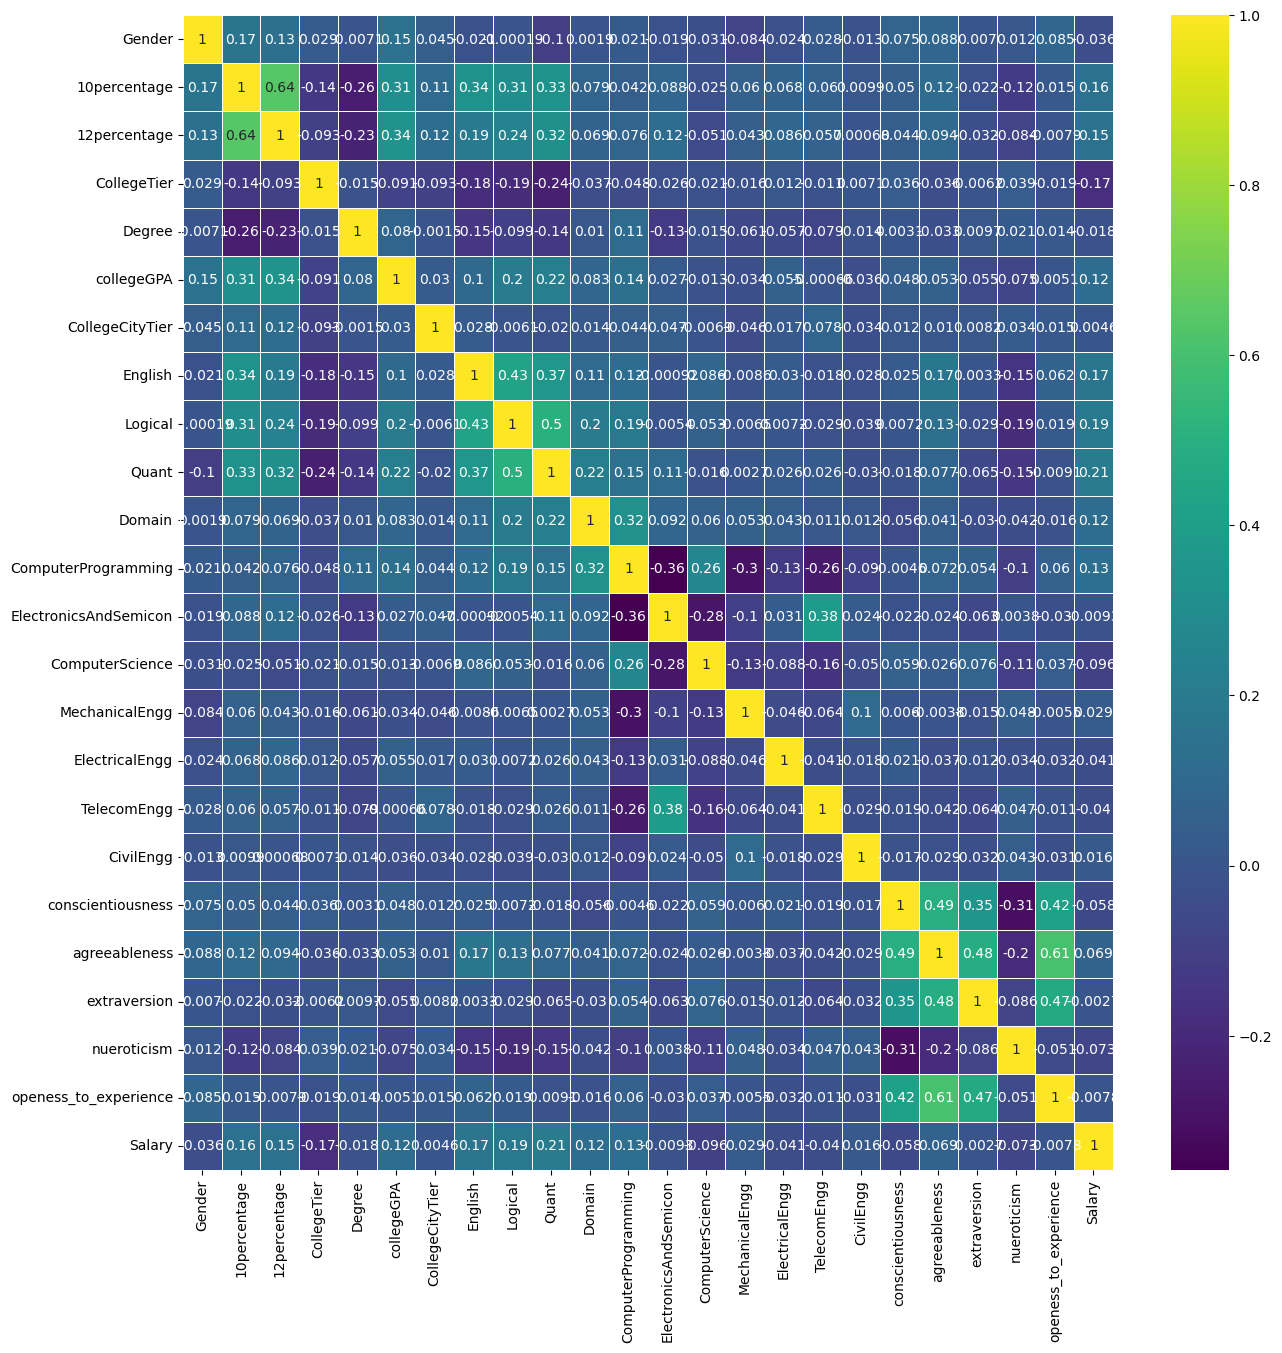

In [266]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix,cmap="viridis", annot=True, linewidths=.5, ax = ax)

## Thử nghiệm, so sánh các mô hình

In [267]:
def getCorrelation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    print(correlated_cols)
    return correlated_cols

p1 = getCorrelation(X_train, 0.001)
p2 = getCorrelation(X_train, 0.2)
p3 = getCorrelation(X_train, 0.3)
p4 = getCorrelation(X_train, 0.4)

p = [p1, p2, p3, p4]
models1 = []

for i in range(4):
    index_set = list(p[i])
    X_1_train = X_train[index_set].copy()
    X_1_test = X_test[index_set].copy()
    models1.append(['Model ' + str(i+1), X_1_train, X_1_test])

{'English', 'CollegeTier', 'CollegeCityTier', 'Logical', 'Quant', '10percentage', 'collegeGPA', 'Degree', '12percentage', 'Domain'}
{'English', 'Logical', 'Quant', 'collegeGPA', 'Degree', '12percentage', 'Domain'}
{'English', 'Logical', 'Quant', 'collegeGPA', '12percentage'}
{'Logical', '12percentage', 'Quant'}


In [268]:
train_3 = pd.read_csv('train.csv')
train_3 = train_3.sample(frac=1)
model = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
ARMSE = []
# 1st model
for i in range(4):
    train_3_1 = train_3.copy()
    X_train_1 = train_3_1[p[i]].copy()
    y_train_1 = train_3_1.iloc[:, -1].copy()

    rg_3_1 = LinearRegression()
    scores_3_1 = cross_val_score(rg_3_1, X_train_1, y_train_1, cv=5, scoring='neg_mean_absolute_error')
    ARMSE.append((np.absolute(scores_3_1)).mean())

C:\Users\HP-PC\AppData\Local\Temp\ipykernel_24500\38113548.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train_1 = train_3_1[p[i]].copy()
C:\Users\HP-PC\AppData\Local\Temp\ipykernel_24500\38113548.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train_1 = train_3_1[p[i]].copy()
C:\Users\HP-PC\AppData\Local\Temp\ipykernel_24500\38113548.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train_1 = train_3_1[p[i]].copy()
C:\Users\HP-PC\AppData\Local\Temp\ipykernel_24500\38113548.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train_1 = train_3_1[p[i]].copy()


In [269]:
Average_RMSE = pd.DataFrame({'Model': model, 'Average RMSE': ARMSE})
print(Average_RMSE.round(3))

     Model  Average RMSE
0  Model 1    113833.464
1  Model 2    113810.552
2  Model 3    114202.504
3  Model 4    115287.393


In [270]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
train3 = pd.read_csv('train.csv')
test3 = pd.read_csv('test.csv')

feature = p2
X_train_best_model = train3[feature].copy()
X_test_best_model = test3[feature].copy()

reg3 = LinearRegression().fit(X_train_best_model, train.iloc[:, -1])

y_test_best_model_pred = reg3.predict(X_test_best_model)
prediction_best_model = pd.DataFrame({'Actual': test3.iloc[:, -1], 'Predicted': y_test_best_model_pred})
print(prediction_best_model.round(3))

coef_best_model = pd.DataFrame({'Coefficient': X_test_best_model.columns, 'Predicted': reg3.coef_})
print(coef_best_model.round(3))

print('Intercept     ', reg3.intercept_.round(3))

     Actual   Predicted
0    280000  189945.112
1    520000  353030.381
2    150000  327537.096
3    180000  267461.884
4    300000  293165.119
..      ...         ...
745  330000  280890.216
746  450000  381482.255
747  180000  279097.628
748   90000  253599.991
749  360000  351626.519

[750 rows x 2 columns]
    Coefficient  Predicted
0       English    177.207
1       Logical    166.112
2         Quant    173.299
3    collegeGPA   1292.326
4        Degree  21553.968
5  12percentage   1445.413
6        Domain  32690.640
Intercept      -192881.577


C:\Users\HP-PC\AppData\Local\Temp\ipykernel_24500\472439811.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train_best_model = train3[feature].copy()
C:\Users\HP-PC\AppData\Local\Temp\ipykernel_24500\472439811.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test_best_model = test3[feature].copy()


In [271]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
mae = (mean_absolute_error(test3.iloc[:, -1], y_test_best_model_pred))
print("MAE: ", mae.round(3))

MAE:  105363.758


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

Salary = 32690.640*`Domain` + 166.112*`Logical` + 1292.326*`collegeGPA` + 1445.413*`12percentage` </br>
    +177.207*`English` + 173.299*`Quant` + 21553.968*`Degree` + (-192881.577)